In [1]:
import xarray as xr
import sys
sys.path.append('c:/users/ssuttles/git/djnpy')
import matlabtools
import matplotlib.pyplot as plt
import pandas as pd
import dolfyn as dlfn
import matplotlib.dates
# %%

In [10]:
fldr = 'D:\\data\\DUNEX\\1137\\vec14836_orange\\'

In [11]:
fn = '113705.VEC'

In [13]:
fin=fldr+fn

In [14]:
fin

'D:\\data\\DUNEX\\1137\\vec14836_orange\\113705.VEC'

In [15]:
dat = dlfn.read(fin)

Reading file D:\data\DUNEX\1137\vec14836_orange\113705.VEC ...
 end of file at 392842522 bytes.


In [16]:
dat.config

NORTEK Header Data Configuration:
  *------------
  | fs                       : 8.0
  > + checkdata
    | Amp1                     : <class 'numpy.ndarray'>
    | Amp2                     : <class 'numpy.ndarray'>
    | Amp3                     : <class 'numpy.ndarray'>
    | First_samp               : <class 'numpy.ndarray'>
    | Samples                  : <class 'numpy.ndarray'>
  > + data_header
    | Corr1                    : <class 'numpy.ndarray'>
    | Corr2                    : <class 'numpy.ndarray'>
    | Corr3                    : <class 'numpy.ndarray'>
    | NRecords                 : <class 'numpy.ndarray'>
    | Noise1                   : <class 'numpy.ndarray'>
    | Noise2                   : <class 'numpy.ndarray'>
    | Noise3                   : <class 'numpy.ndarray'>
    | Spare0                   : <class 'numpy.ndarray'>
    | Spare1                   : <class 'numpy.ndarray'>
    | time                     : <class 'numpy.ndarray'>
  > + hardware
    | FWver

In [15]:
dat.signal

<class 'dolfyn.data.base.TimeData'>: Data Object with Keys:
  *------------
  | amp                      : <array; (3, 14270104); uint8>
  | corr                     : <array; (3, 14270104); uint8>

In [16]:
dat.orient

<class 'dolfyn.data.base.TimeData'>: Data Object with Keys:
  *------------
  | orientmat                : <array; (3, 3, 14270104); float32>
  + raw                      : + DATA GROUP

In [17]:
dat.orient.raw

<class 'dolfyn.data.base.TimeData'>: Data Object with Keys:
  *------------
  | heading                  : <array; (14270104,); float32>
  | orientation_down         : <array; (14270104,); bool>
  | pitch                    : <array; (14270104,); float32>
  | roll                     : <array; (14270104,); float32>

In [18]:
dat.env

<class 'dolfyn.data.base.TimeData'>: Data Object with Keys:
  *------------
  | c_sound                  : <array; (14270104,); float32>
  | pressure                 : <array; (14270104,); float64>
  | temp                     : <array; (14270104,); float32>

In [19]:
ds = xr.Dataset()
#times = [matlabtools.matlab2datetime(x, tz=None) for x in dat.mpltime]
times = [dlfn.data.time.num2date(x) for x in dat.mpltime]
ds['time'] = xr.DataArray(times, dims='time')
ds['orientmat'] = xr.DataArray(dat.orient.orientmat,dims=('beam','beam', 'time'))
# ds['time_b5'] = xr.DataArray(times, dims='time')
#ds['range'] = xr.DataArray(dat.range, dims='range')
#ds['range_b5'] = xr.DataArray(dat.range_b5, dims='range_b5')
#ds['range_echo'] = xr.DataArray(dat.range_echo, dims='range_echo')
#ds['beam'] = xr.DataArray(range(4), dims='beam')
# ds['beam_b5']= xr.DataArray([4], dims='beam_b5')
ds['vel'] = xr.DataArray(dat.vel, dims=('beam', 'time'))
ds['amp'] = xr.DataArray(dat.signal.amp, dims=('beam', 'time'))
ds['corr'] = xr.DataArray(dat.signal.corr, dims=('beam', 'time'))
#ds['vel_b5'] = xr.DataArray(dat.vel_b5.squeeze(), dims=('range_b5', 'time'))
ds['Tx_1211'] = xr.DataArray(dat.env.temp, dims='time')
ds['P_1'] = xr.DataArray(dat.env.pressure, dims='time')
ds['hdg'] = xr.DataArray(dat.orient.raw.heading, dims=('time'))
ds['ptch'] = xr.DataArray(dat.orient.raw.pitch, dims=('time'))
ds['roll'] = xr.DataArray(dat.orient.raw.roll, dims=('time'))
ds.to_netcdf('1137vec.cdf', encoding={'amp':{'dtype':'int16'}, 'corr':{'dtype':'int16'}})

In [20]:
ds

<xarray.Dataset>
Dimensions:    (beam: 3, time: 14270104)
Coordinates:
  * time       (time) datetime64[ns] 2021-09-13T09:00:03.000014 ... 2021-10-1...
Dimensions without coordinates: beam
Data variables:
    orientmat  (beam, beam, time) float32 -0.4735 -0.4735 ... 0.9828 0.9828
    vel        (beam, time) float32 -1.028 -0.381 -0.504 ... 0.245 -0.383 1.315
    amp        (beam, time) uint8 43 43 43 43 43 43 42 ... 39 39 40 40 39 40 39
    corr       (beam, time) uint8 6 18 7 13 5 13 5 16 9 ... 6 7 19 2 14 11 8 16
    Tx_1211    (time) float32 23.04 23.04 23.04 23.04 23.04 ... nan nan nan nan
    P_1        (time) float64 0.698 0.695 0.704 0.704 ... 0.613 0.61 0.613 0.613
    hdg        (time) float32 331.7 331.7 331.7 331.7 331.7 ... nan nan nan nan
    ptch       (time) float32 -2.8 -2.8 -2.8 -2.8 -2.8 ... 0.9 nan nan nan nan
    roll       (time) float32 1.9 1.9 1.9 1.9 1.9 1.9 ... -10.6 nan nan nan nan

In [10]:
dat.orient.orientmat[:,:,200000]

array([[-0.86026067, -0.50951713,  0.01854306],
       [-0.5049473 ,  0.8564511 ,  0.1073303 ],
       [-0.07056785,  0.08296877, -0.9940505 ]], dtype=float32)

In [11]:
dat.orient.raw.heading[200000]

239.3625

In [12]:
RAW = xr.open_dataset('1137vec.cdf')

In [13]:
RAW

<xarray.Dataset>
Dimensions:  (beam: 3, time: 14270104)
Coordinates:
  * time     (time) datetime64[ns] 2021-09-13T09:00:03.000014 ... 2021-10-10T...
Dimensions without coordinates: beam
Data variables:
    Tx_1211  (time) float32 ...
    P_1      (time) float64 ...
    hdg      (time) float32 ...
    ptch     (time) float32 ...
    roll     (time) float32 ...
    vel      (beam, time) float32 ...
    amp      (beam, time) int16 ...
    corr     (beam, time) int16 ...

In [14]:
RAW.hdg

<xarray.DataArray 'hdg' (time: 14270104)>
[14270104 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-09-13T09:00:03.000014 ... 2021-10-10T...

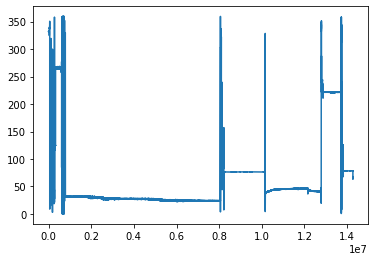

In [15]:
plt.plot(RAW.hdg)

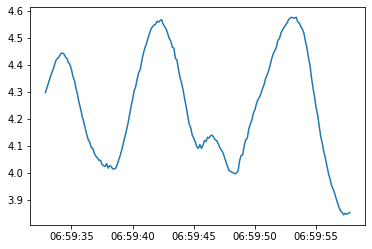

In [28]:
plt.plot(RAW.time[-8540000:-8539800],RAW.P_1[-8540000:-8539800])

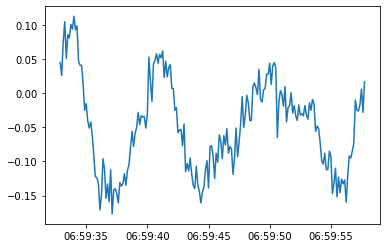

In [17]:
plt.plot(RAW.time[-8540000:-8539800],RAW.vel[0,-8540000:-8539800])

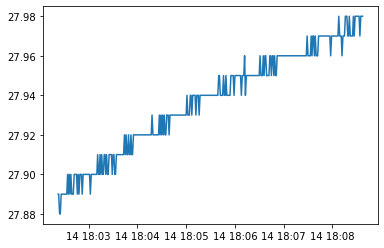

In [18]:
plt.plot(RAW.time[722000:725000],RAW.Tx_1211[722000:725000])

In [9]:
import matlabtools

In [5]:
dat.mpltime[0]

738046.3750347224

In [19]:
dat

<ADV data object>
  . 27.20 days (started: Sep 13, 2021 09:00)
  . beam-frame
  . (14270104 pings @ 8.0Hz)
  *------------
  | mpltime                  : <time_array; (14270104,); float64>
  | vel                      : <array; (3, 14270104); float32>
  + config                   : + DATA GROUP
  + env                      : + DATA GROUP
  + orient                   : + DATA GROUP
  + props                    : + DATA GROUP
  + signal                   : + DATA GROUP
  + sys                      : + DATA GROUP

In [12]:
times0 = dlfn.data.time.num2date(dat.mpltime[0])

In [13]:
times0

datetime.datetime(2021, 9, 13, 9, 0, 3, 14)

In [23]:
timeslast = matlabtools.matlab2datetime(dat.mpltime[-1], tz='utc')

In [24]:
timeslast

datetime.datetime(2021, 10, 10, 13, 42, 9, 552410, tzinfo=<UTC>)

In [25]:
dat.mpltime.dtype

dtype('float64')

In [26]:
matlabtools.datetime2matlab(times0)

738046.3750347224

In [27]:
matlabtools.matlab2datetime(matlabtools.datetime2matlab(times0), tz='utc')

datetime.datetime(2021, 9, 13, 9, 0, 3, 14, tzinfo=<UTC>)

In [17]:
13762727 % 65535

377

In [53]:
dat.vel.shape

(3, 14270104)

In [33]:
import numpy as np

In [51]:
rs = np.reshape(dat.vel[:,:-14270104 % 65535+1],(3,65535,217)

SyntaxError: unexpected EOF while parsing (<ipython-input-51-ed1860f90847>, line 1)

In [65]:
14221095 % 65535

0

In [48]:
14270104 % 65535+1

49010

In [62]:
dat.vel[:,:-1*(14270104 % 65535)].shape

(3, 14221095)

In [142]:
rs = np.reshape(dat.vel[:,:-1*(14270104 % 65535)].transpose(),(-1,65535,3))

In [143]:
rs.shape

(217, 65535, 3)

In [154]:
rs[1,:10,:]

array([[ 0.93000007, -2.4550002 , -0.88400006],
       [ 0.827     ,  0.388     , -0.448     ],
       [-1.516     , -0.20400001, -1.3700001 ],
       [ 0.58000004, -1.7910001 , -0.44200003],
       [ 0.42000002,  2.6490002 , -1.2720001 ],
       [-1.312     , -1.9860001 ,  1.049     ],
       [-2.1200001 , -3.0240002 , -1.274     ],
       [ 0.625     ,  2.6330001 ,  1.1620001 ],
       [ 0.051     ,  2.2120001 ,  1.34      ],
       [ 0.05      ,  2.233     , -2.032     ]], dtype=float32)

In [158]:
dat.vel[:,65535:65545].transpose()

array([[ 0.93000007, -2.4550002 , -0.88400006],
       [ 0.827     ,  0.388     , -0.448     ],
       [-1.516     , -0.20400001, -1.3700001 ],
       [ 0.58000004, -1.7910001 , -0.44200003],
       [ 0.42000002,  2.6490002 , -1.2720001 ],
       [-1.312     , -1.9860001 ,  1.049     ],
       [-2.1200001 , -3.0240002 , -1.274     ],
       [ 0.625     ,  2.6330001 ,  1.1620001 ],
       [ 0.051     ,  2.2120001 ,  1.34      ],
       [ 0.05      ,  2.233     , -2.032     ]], dtype=float32)

In [108]:
a= np.arange(25).reshape(5,5)

In [109]:
a.shape

(5, 5)

In [110]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [111]:
a.transpose()

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [160]:
RAW.vel.shape

(3, 14270104)